# Pandas tutorial

In [203]:
import numpy as np
import pandas as pd

## Series object

In [51]:
series_1 = pd.Series(np.array([10, 20, 30, 40]))
series_1

0    10
1    20
2    30
3    40
dtype: int32

In [52]:
series_2 = pd.Series(data=np.arange(4), index=['A', 'B', 'C', 'D'])
series_2

A    0
B    1
C    2
D    3
dtype: int32

In [53]:
series_2.values # Getting values of the series

array([0, 1, 2, 3])

In [56]:
series_2.index # Getting indices of the series

Index(['A', 'B', 'C', 'D'], dtype='object')

In [59]:
series_2['A'] # Getting the value corresponding to label(index) 'A'

0

In [60]:
series_2[['A', 'C']] # Getting the values corresponding to several labels: 'A', 'B'

A    0
C    2
dtype: int32

In [64]:
series_2[series_2 > 2] # We can do boolean conditioning 

D    3
dtype: int32

In [65]:
np.exp(series_2) # We can pass a Series object to NumPy functions

A     1.000000
B     2.718282
C     7.389056
D    20.085537
dtype: float64

In [66]:
series_2 * 4 # We can do arithmetic with Series object

A     0
B     4
C     8
D    12
dtype: int32

We can think of Series object as a dictionary since it maps an index to a value.

In [67]:
'B' in series_2

True

In [68]:
'F' in series_2

False

We can pass a dictionary to pd.Series().

In [69]:
dict_1 = {'wellness': 'Yarishna',
          'figure': 'Rebecca',
          'bodybuilding': 'Iman',
         '212': 'Shaun'}
series_2 = pd.Series(dict_1)
series_2

wellness        Yarishna
figure           Rebecca
bodybuilding        Iman
212                Shaun
dtype: object

We can override the index by changing the index explicitly. If the index already exists as a dictionary key, then we will have a value associated with it, otherwise we receive NaN.

In [71]:
pd.Series(dict_1, index=['FBB', 'Natural FBB', 'best natural', 'Giant killer'])

FBB             NaN
Natural FBB     NaN
best natural    NaN
Giant killer    NaN
dtype: object

In [73]:
series_3 = pd.Series(dict_1, index=['figure', '212', 'best natural', 'wellness'])
series_3

figure           Rebecca
212                Shaun
best natural         NaN
wellness        Yarishna
dtype: object

Finding missing values: *isnull*, *notnull* both as pandas functions and Series methods. 

In [74]:
pd.isnull(series_3)

figure          False
212             False
best natural     True
wellness        False
dtype: bool

In [75]:
pd.notnull(series_3)

figure           True
212              True
best natural    False
wellness         True
dtype: bool

In [76]:
series_3.isnull()

figure          False
212             False
best natural     True
wellness        False
dtype: bool

In [77]:
series_3.notnull()

figure           True
212              True
best natural    False
wellness         True
dtype: bool

When we perform arithmetic operations on Series objects, the objects are aligned by index.

In [79]:
series_4 = pd.Series(data=np.random.randint(1, 5, 5), index=['C', 'D', 'E', 'F', 'G'])
series_5 = pd.Series(data=np.random.randint(1, 5, 5), index=['A', 'B', 'C', 'D', 'G'])
print(series_4)
print(series_5)

C    2
D    2
E    1
F    1
G    3
dtype: int32
A    4
B    1
C    3
D    1
G    1
dtype: int32


In [80]:
series_4 + series_5

A    NaN
B    NaN
C    5.0
D    3.0
E    NaN
F    NaN
G    4.0
dtype: float64

We can change a Series index inplace:

In [82]:
series_4.index = range(5)
series_4

0    2
1    2
2    1
3    1
4    3
dtype: int32

Both Series object and its index have name attributes:

In [84]:
series_4.name = 'Example Series'
series_4.index.name = 'myInd'
print(series_4)

myInd
0    2
1    2
2    1
3    1
4    3
Name: Example Series, dtype: int32


## DataFrame

In [87]:
dataframe_1 = pd.DataFrame(data = np.random.randn(6, 3), columns=['Books', 'Pens', 'Shoes'])
dataframe_1

,Books,Pens,Shoes
0,0.494267,0.103533,-0.237604
1,-2.831102,0.683317,-0.801478
2,-0.270498,-0.014077,2.144846
3,-0.570360,-1.171104,-1.079871
4,-1.012490,0.554717,-0.292275
5,1.070774,0.519833,0.192617


In [88]:
dataframe_1.index = ['A', 'B', 'C', 'D', 'E', 'F'] # This is how we change the index in place
dataframe_1

,Books,Pens,Shoes
A,0.494267,0.103533,-0.237604
B,-2.831102,0.683317,-0.801478
C,-0.270498,-0.014077,2.144846
D,-0.570360,-1.171104,-1.079871
E,-1.012490,0.554717,-0.292275
F,1.070774,0.519833,0.192617


In [89]:
pd.DataFrame(data = np.random.randn(6, 3), columns=['Books', 'Pens', 'Shoes'], index=['A', 'B', 'C','D','E','F'])

,Books,Pens,Shoes
A,-0.957765,0.314912,-0.034336
B,-0.820500,1.352835,-0.207851
C,0.767108,-1.607306,1.190880
D,0.021868,-0.309835,0.478874
E,-1.257675,1.775337,-2.102003
F,0.656187,0.051832,1.352361


We can also pass a dictionary to pd.DataFrame to create an object.

In [100]:
dict_2 = {'A': np.arange(10), 'B': np.random.randint(1, 7, 10), 'C': np.random.randn(10)} 
print(f"Created DataFrame using dictionary:\n{pd.DataFrame(dict_2)}") # Automatically assigns the index
print(f"\nCreated DataFrame by specifying the index:\n{pd.DataFrame(dict_2, index=list('EFGHIGKLMN'))}") # We can pass the index like this.


Created DataFrame using dictionary:
   A  B         C
0  0  6 -1.190121
1  1  6  0.400636
2  2  6  1.376592
3  3  2 -0.765050
4  4  2 -0.461140
5  5  1  0.773439
6  6  1  0.548765
7  7  1  1.242279
8  8  1 -1.282618
9  9  4 -0.731828

Created DataFrame by specifying the index:
   A  B         C
E  0  6 -1.190121
F  1  6  0.400636
G  2  6  1.376592
H  3  2 -0.765050
I  4  2 -0.461140
G  5  1  0.773439
K  6  1  0.548765
L  7  1  1.242279
M  8  1 -1.282618
N  9  4 -0.731828


In [102]:
pd.DataFrame(dict_2).head() # head() method shows the first 5 rows of a DataFrame.

,A,B,C
0,0,6,-1.190121
1,1,6,0.400636
2,2,6,1.376592
3,3,2,-0.765050
4,4,2,-0.461140


In [103]:
pd.DataFrame(dict_2, columns=['B', 'C', 'A']) # Rearranging the columns

,B,C,A
0,6,-1.190121,0
1,6,0.400636,1
2,6,1.376592,2
3,2,-0.765050,3
4,2,-0.461140,4
5,1,0.773439,5
6,1,0.548765,6
7,1,1.242279,7
8,1,-1.282618,8
9,4,-0.731828,9


In [120]:
pd.DataFrame(dict_2, columns=['A', 'B', 'C', 'D']) # Here, we don't have a key 'D' in dict_2. 
#Including 'D' in the columns will add that column and assigns NaN values to it.

,A,B,C,D
0,0,6,-1.190121,NaN
1,1,6,0.400636,NaN
2,2,6,1.376592,NaN
3,3,2,-0.765050,NaN
4,4,2,-0.461140,NaN
5,5,1,0.773439,NaN
6,6,1,0.548765,NaN
7,7,1,1.242279,NaN
8,8,1,-1.282618,NaN
9,9,4,-0.731828,NaN


Retrieving a column:

Either use dictionary notation or attribute: df['columnName'] or df.columnName

In [122]:
dataframe_1['Pens']

A    0.103533
B    0.683317
C   -0.014077
D   -1.171104
E    0.554717
F    0.519833
Name: Pens, dtype: float64

In [123]:
dataframe_1.Pens

A    0.103533
B    0.683317
C   -0.014077
D   -1.171104
E    0.554717
F    0.519833
Name: Pens, dtype: float64

Note that dictionary notation for getting a column works with any column name, but using attribute only works if the columnName is a valued Python variable name.

In [124]:
dataframe_1.columns

Index(['Books', 'Pens', 'Shoes'], dtype='object')

In [126]:
dataframe_1.columns = ['Books', 'Pens', 1]
dataframe_1

,Books,Pens,1
A,0.494267,0.103533,-0.237604
B,-2.831102,0.683317,-0.801478
C,-0.270498,-0.014077,2.144846
D,-0.570360,-1.171104,-1.079871
E,-1.012490,0.554717,-0.292275
F,1.070774,0.519833,0.192617


In [128]:
dataframe_1[1]

A   -0.237604
B   -0.801478
C    2.144846
D   -1.079871
E   -0.292275
F    0.192617
Name: 1, dtype: float64

In [130]:
dataframe_1.1 # We cannot retrieve column corresponding to 1!

SyntaxError: invalid syntax (492237829.py, line 1)

In [135]:
print(dataframe_1)
dataframe_1.loc['C'] # retrieves row with index 'C'

      Books      Pens         1
A  0.494267  0.103533 -0.237604
B -2.831102  0.683317 -0.801478
C -0.270498 -0.014077  2.144846
D -0.570360 -1.171104 -1.079871
E -1.012490  0.554717 -0.292275
F  1.070774  0.519833  0.192617


Books   -0.270498
Pens    -0.014077
1        2.144846
Name: C, dtype: float64

In [136]:
dataframe_1.iloc[2] # retrieves row number 3

Books   -0.270498
Pens    -0.014077
1        2.144846
Name: C, dtype: float64

In [138]:
dataframe_2 = pd.DataFrame(dict_2, columns=['A', 'B', 'C', 'D'])
print(dataframe_2)
dataframe_2['D'] = 2
print(dataframe_2)

   A  B         C    D
0  0  6 -1.190121  NaN
1  1  6  0.400636  NaN
2  2  6  1.376592  NaN
3  3  2 -0.765050  NaN
4  4  2 -0.461140  NaN
5  5  1  0.773439  NaN
6  6  1  0.548765  NaN
7  7  1  1.242279  NaN
8  8  1 -1.282618  NaN
9  9  4 -0.731828  NaN
   A  B         C  D
0  0  6 -1.190121  2
1  1  6  0.400636  2
2  2  6  1.376592  2
3  3  2 -0.765050  2
4  4  2 -0.461140  2
5  5  1  0.773439  2
6  6  1  0.548765  2
7  7  1  1.242279  2
8  8  1 -1.282618  2
9  9  4 -0.731828  2


In [142]:
dataframe_2['D'] = np.random.randn(10,1) # length of the assigned vector should match the number of rows in DF.
dataframe_2

,A,B,C,D
0,0,6,-1.190121,-1.615323
1,1,6,0.400636,-0.229937
2,2,6,1.376592,1.551206
3,3,2,-0.765050,0.038678
4,4,2,-0.461140,-0.753830
5,5,1,0.773439,0.471062
6,6,1,0.548765,-0.046366
7,7,1,1.242279,-0.861164
8,8,1,-1.282618,0.144519
9,9,4,-0.731828,-0.556329


In [155]:
series_6 = pd.Series(np.random.randint(1,5,10), index=np.arange(4, 14)) # 
dataframe_2 ['D'] = series_6 # When assigning a Series to a DF column, index are aligned.
dataframe_2

,A,B,C,D
0,0,6,-1.190121,NaN
1,1,6,0.400636,NaN
2,2,6,1.376592,NaN
3,3,2,-0.765050,NaN
4,4,2,-0.461140,1.0
5,5,1,0.773439,1.0
6,6,1,0.548765,3.0
7,7,1,1.242279,4.0
8,8,1,-1.282618,3.0
9,9,4,-0.731828,3.0


In [156]:
del dataframe_2['D'] # del keyword deletes a column
dataframe_2

,A,B,C
0,0,6,-1.190121
1,1,6,0.400636
2,2,6,1.376592
3,3,2,-0.765050
4,4,2,-0.461140
5,5,1,0.773439
6,6,1,0.548765
7,7,1,1.242279
8,8,1,-1.282618
9,9,4,-0.731828


In [158]:
dataframe_1 = pd.DataFrame(np.random.randn(6,3), columns=['Books', 'Pens', 'Shoes'])
print(dataframe_1)
book = dataframe_1['Books']
book = 1
print(dataframe_1)

      Books      Pens     Shoes
0 -0.336848 -1.747893 -2.623477
1  0.429558  0.412985 -0.454417
2  0.076991  0.283844 -0.512662
3  0.864625  2.176568  0.495595
4 -0.494927  0.931763  1.603079
5  2.809987  0.002387 -0.343251
      Books      Pens     Shoes
0 -0.336848 -1.747893 -2.623477
1  0.429558  0.412985 -0.454417
2  0.076991  0.283844 -0.512662
3  0.864625  2.176568  0.495595
4 -0.494927  0.931763  1.603079
5  2.809987  0.002387 -0.343251


In [167]:
dataframe_1.columns.name = 'Commodity' # Setting name of the columns to be 'commodity'
dataframe_1.index.name = 'rows' # Setting name of the index to be 'rows'
dataframe_1

Commodity,Books,Pens,Shoes
rows,,,
0,-0.336848,-1.747893,-2.623477
1,0.429558,0.412985,-0.454417
2,0.076991,0.283844,-0.512662
3,0.864625,2.176568,0.495595
4,-0.494927,0.931763,1.603079
5,2.809987,0.002387,-0.343251


We can pass a nested dictionary to pd.DataFrame(). So basically, a dict of dict. 

In [175]:
dictOfDict_1 = {'Column1': {'ind1': 1, 'ind2': 2, 'ind3': 3},
              'Column2': {'ind1': 4, 'ind2': 5, 'ind3': 6},
              'Column3': {'ind1': 7, 'ind2': 8, 'ind3': 9}} 
pd.DataFrame(dictOfDict_1)
# The outer keys are regarded as Column names.

,Column1,Column2,Column3
ind1,1,4,7
ind2,2,5,8
ind3,3,6,9


In [178]:
pd.DataFrame(dictOfDict_1, index=['ind2', 'ind3', 'ind4']) # Here we override the indexes. Notice the NaN values.

,Column1,Column2,Column3
ind2,2.0,5.0,8.0
ind3,3.0,6.0,9.0
ind4,NaN,NaN,NaN


We can also pass a dict of Series:

In [182]:
dictOfSeries_1 = {'cost': dataframe_2['A'],
                  'tax': dataframe_2['B'],
                  'income': dataframe_2['C']}
pd.DataFrame(dictOfSeries_1)
# index of Series is used as the index of the built DataFrame.

,cost,tax,income
0,0,6,-1.190121
1,1,6,0.400636
2,2,6,1.376592
3,3,2,-0.765050
4,4,2,-0.461140
5,5,1,0.773439
6,6,1,0.548765
7,7,1,1.242279
8,8,1,-1.282618
9,9,4,-0.731828


Some hotKey for Jupyter notebook: if you want to create an empy cell after a cell, press B. A cell before the current cell, press A.

In [194]:
dataframe_2.values # Getting values of the DataFrame

array([[ 0.        ,  6.        , -1.19012108],
       [ 1.        ,  6.        ,  0.40063641],
       [ 2.        ,  6.        ,  1.37659167],
       [ 3.        ,  2.        , -0.76505042],
       [ 4.        ,  2.        , -0.46113953],
       [ 5.        ,  1.        ,  0.77343874],
       [ 6.        ,  1.        ,  0.54876485],
       [ 7.        ,  1.        ,  1.24227924],
       [ 8.        ,  1.        , -1.28261781],
       [ 9.        ,  4.        , -0.7318279 ]])

In [195]:
series_3.values # Getting values of the Series

array(['Rebecca', 'Shaun', nan, 'Yarishna'], dtype=object)

In [196]:
print(dataframe_2['B'].value_counts()) # Counting number of times each element in the column 'B' is repeated.
print(dataframe_2)

1    4
6    3
2    2
4    1
Name: B, dtype: int64
   A  B         C
0  0  6 -1.190121
1  1  6  0.400636
2  2  6  1.376592
3  3  2 -0.765050
4  4  2 -0.461140
5  5  1  0.773439
6  6  1  0.548765
7  7  1  1.242279
8  8  1 -1.282618
9  9  4 -0.731828


<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\ISHVA5\AppData\Local\Temp\ipykernel_16904\2977404684.py:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  b is 3


True

We can transpose a DataFrame:

In [174]:
dataframe_1.T

rows,0,1,2,3,4,5
Commodity,,,,,,
Books,-0.336848,0.429558,0.076991,0.864625,-0.494927,2.809987
Pens,-1.747893,0.412985,0.283844,2.176568,0.931763,0.002387
Shoes,-2.623477,-0.454417,-0.512662,0.495595,1.603079,-0.343251


### reindexing: 

In [236]:
dataframe_3 = pd.DataFrame(data=np.random.randn(7, 5), columns=list('ABCDE'),
                           index=range(7))
dataframe_3

,A,B,C,D,E
0,-1.182805,-0.573522,0.722087,-0.548452,-1.090744
1,-1.078241,-0.397446,0.376901,-0.608754,-0.154536
2,-1.042637,1.033444,0.407018,2.679942,-1.382832
3,0.083207,0.154073,0.851235,0.464839,-0.701121
4,2.309516,0.753135,-0.195944,0.560782,1.042010
5,-0.016921,-0.027066,-0.714559,-0.583240,-0.574336
6,1.736400,1.405636,-0.657928,-1.683500,-0.399756


In [238]:
dataframe_4 = dataframe_3.reindex(index=[1, 2, 8, 6, 7])
dataframe_4 # values corresponding to the indices that don't exist in the original DF will be NaN.

,A,B,C,D,E
1,-1.078241,-0.397446,0.376901,-0.608754,-0.154536
2,-1.042637,1.033444,0.407018,2.679942,-1.382832
8,NaN,NaN,NaN,NaN,NaN
6,1.736400,1.405636,-0.657928,-1.683500,-0.399756
7,NaN,NaN,NaN,NaN,NaN


In [240]:
dataframe_3.reindex(index=[1, 2, 8, 6, 7], method='ffill') # we can fill in NaN values using method.
# Here, the method is forward fill.

,A,B,C,D,E
1,-1.078241,-0.397446,0.376901,-0.608754,-0.154536
2,-1.042637,1.033444,0.407018,2.679942,-1.382832
8,1.736400,1.405636,-0.657928,-1.683500,-0.399756
6,1.736400,1.405636,-0.657928,-1.683500,-0.399756
7,1.736400,1.405636,-0.657928,-1.683500,-0.399756


We can reindex columns as well. If we only pass one list, then we are changing the index. 

In [252]:
dataframe_3.reindex(index=[1, 2, 8, 6, 7], columns=['A', 'C', 'E'])

,A,C,E
1,-1.078241,0.376901,-0.154536
2,-1.042637,0.407018,-1.382832
8,NaN,NaN,NaN
6,1.736400,-0.657928,-0.399756
7,NaN,NaN,NaN


### Dropping entries from axes

In [253]:
obj = pd.DataFrame(data=np.arange(12).reshape(3, 4), columns=list('ABCD'))
obj

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [256]:
obj.drop(1) # This drops the row with index 1. 

,A,B,C,D
0,0,1,2,3
2,8,9,10,11


In [258]:
print(obj) # you can see that by calling the drop method, obj did not change. We can however make the change
# to be in place
obj.drop(2, inplace=True)
print(f"The new obj is \n{obj}")

   A  B   C   D
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
The new obj is 
   A  B  C  D
0  0  1  2  3
1  4  5  6  7


We can also drop columns. For this, we should write axis = 1 or axis = 'columns'

In [264]:
obj = pd.DataFrame(data=np.arange(12).reshape(3, 4), columns=list('ABCD'))
obj.drop(['A', 'B'], axis = 1)

,C,D
0,2,3
1,6,7
2,10,11


In [266]:
obj.drop('C', axis = 'columns')

,A,B,D
0,0,1,3
1,4,5,7
2,8,9,11


### Indexing

In [276]:
obj_s = pd.Series(np.arange(3, 7), index=list('QWER'))
obj_s

Q    3
W    4
E    5
R    6
dtype: int32

In [277]:
obj_s[1]

4

In [283]:
obj_s[0:2]

Q    3
W    4
dtype: int32

In [285]:
obj_s[['W', 'R']]

W    4
R    6
dtype: int32

In [286]:
obj_s[obj_s > 3]

W    4
E    5
R    6
dtype: int32

In [288]:
obj_s['Q': 'E'] # Note that this way of slicing with indexes is inclusive of the end-point.

Q    3
W    4
E    5
dtype: int32

In [290]:
obj_s['Q': 'E'] = np.array([7, 8, 9]) # This will change obj_s in place
obj_s 

Q    7
W    8
E    9
R    6
dtype: int32

Operation on DF:

Let's try this on DataFrame. It is not exactly the same because when we write df[x], it returns column, not row. To return row(s), we should use the slicing notation ":".

In [280]:
obj.index = list('ghj')
obj

,A,B,C,D
g,0,1,2,3
h,4,5,6,7
j,8,9,10,11


In [281]:
obj[1:2] # if you pass obj[1], you will get an error! Note that obj[] returns column(s), but slicing like the 
#one here works to return rows.

,A,B,C,D
h,4,5,6,7


In [282]:
obj[0:2]

,A,B,C,D
g,0,1,2,3
h,4,5,6,7


Some operations on DF:

In [293]:
print(obj)
obj > 5

   A  B   C   D
g  0  1   2   3
h  4  5   6   7
j  8  9  10  11


,A,B,C,D
g,False,False,False,False
h,False,False,True,True
j,True,True,True,True


In [295]:
obj[obj > 5] = 10

In [296]:
obj

,A,B,C,D
g,0,1,2,3
h,4,5,10,10
j,10,10,10,10


Selection with loc and iloc:

In [247]:
print(dataframe_4)
dataframe_4.loc[[2, 6], ['A', 'B']] # loc can be used to access particular cut of the DF. 
# it is basically a way of reindexing.

          A         B         C         D         E
1 -1.078241 -0.397446  0.376901 -0.608754 -0.154536
2 -1.042637  1.033444  0.407018  2.679942 -1.382832
8       NaN       NaN       NaN       NaN       NaN
6  1.736400  1.405636 -0.657928 -1.683500 -0.399756
7       NaN       NaN       NaN       NaN       NaN


,A,B
2,-1.042637,1.033444
6,1.736400,1.405636


In [249]:
dataframe_4.iloc[0, 1]

-0.39744552867152044

In [250]:
dataframe_1

Commodity,Books,Pens,Shoes
rows,,,
0,-0.336848,-1.747893,-2.623477
1,0.429558,0.412985,-0.454417
2,0.076991,0.283844,-0.512662
3,0.864625,2.176568,0.495595
4,-0.494927,0.931763,1.603079
5,2.809987,0.002387,-0.343251


In [251]:
dataframe_1[dataframe_1['Books'] > 0]

Commodity,Books,Pens,Shoes
rows,,,
1,0.429558,0.412985,-0.454417
2,0.076991,0.283844,-0.512662
3,0.864625,2.176568,0.495595
5,2.809987,0.002387,-0.343251


In [47]:
dict1 = {'color':['red', 'blue', 'green'], 'price': [10, 23, 34]}
myDF = pd.DataFrame(dict1, index=['A', 'B', 'C'])
myDF

,color,price
A,red,10
B,blue,23
C,green,34


In [6]:
dict_5 = {'Store': [1, 2, 1, 2], 'Flavor': ['Choc', 'Van', 'Straw', 'Choc'], 'Sales': [26, 12, 18, 22]}
df_5 = pd.DataFrame(dict_5)
df_5

,Store,Flavor,Sales
0,1,Choc,26
1,2,Van,12
2,1,Straw,18
3,2,Choc,22


In [12]:
byStore = df_5.groupby('Store')
byStore.mean()

,Sales
Store,
1,22.0
2,17.0


In [13]:
byStore.sum().loc[1]

Sales    44
Name: 1, dtype: int64

In [15]:
byStore.describe()

Sales                                              
      count  mean       std   min   25%   50%   75%   max
Store                                                    
1       2.0  22.0  5.656854  18.0  20.0  22.0  24.0  26.0
2       2.0  17.0  7.071068  12.0  14.5  17.0  19.5  22.0

#When you enter the parantheses you can press shift + tab to know the keys you can set. very informative.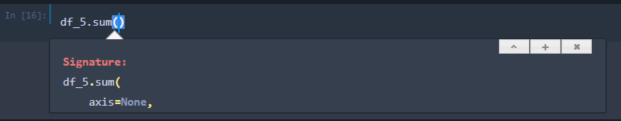

In [16]:
df_5.sum()

Store                    6
Flavor    ChocVanStrawChoc
Sales                   78
dtype: object

In [18]:
df_5.describe()

,Store,Sales
count,4.00000,4.000000
mean,1.50000,19.500000
std,0.57735,5.972158
min,1.00000,12.000000
25%,1.00000,16.500000
50%,1.50000,20.000000
75%,2.00000,23.000000
max,2.00000,26.000000


In [19]:
df_5

,Store,Flavor,Sales
0,1,Choc,26
1,2,Van,12
2,1,Straw,18
3,2,Choc,22


In [26]:
df_5['Sales'].apply(np.sqrt)

0    5.099020
1    3.464102
2    4.242641
3    4.690416
Name: Sales, dtype: float64

In [29]:
series1 = pd.Series(('iman', 'Shafikhani'), index = ['First name', 'Last name'])
series1

First name          iman
Last name     Shafikhani
dtype: object

In [32]:
df_1 = pd.DataFrame({'Contact': ['Iman Shafikhani', 'Mohammad Binaei']})
df_1

,Contact
0,Iman Shafikhani
1,Mohammad Binaei


In [34]:
def split_names(df):
    def get_names(full_name):
        f_name, l_name = full_name.split()
        return pd.Series(
        (f_name, l_name),
        index = ['First name', 'Last name'])
    names = df['Contact'].apply(get_names)
    df[names.columns] = names
    return df

In [36]:
    def get_names(full_name):
        f_name, l_name = full_name.split()
        return pd.Series(
        (f_name, l_name),
        index = ['First name', 'Last name'])

In [39]:
names = df_1['Contact'].apply(get_names)
names

,First name,Last name
0,Iman,Shafikhani
1,Mohammad,Binaei


In [40]:
names.columns

Index(['First name', 'Last name'], dtype='object')

In [42]:
df_1[names.columns] = names

In [43]:
df_1

,Contact,First name,Last name
0,Iman Shafikhani,Iman,Shafikhani
1,Mohammad Binaei,Mohammad,Binaei
